In [5]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Extract 1yr SPY data (6/24/19 - 6/24/2020) and dump to a csv file
datafile = 'SPY.csv'
#This creates a dataframe from the CSV file:
data = pd.read_csv(datafile, index_col = 'Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-24,294.230011,294.579987,293.470001,293.640015,287.892944,47582700
2019-06-25,293.700012,293.730011,290.640015,290.760010,285.069305,82028700
2019-06-26,291.750000,292.309998,290.350006,290.470001,284.785004,51584900
2019-06-27,291.309998,292.059998,290.890015,291.500000,285.794830,40355200
2019-06-28,292.579987,293.549988,292.010010,293.000000,287.265442,59350900
...,...,...,...,...,...,...
2020-06-18,310.010010,312.299988,309.510010,311.779999,310.414001,80828700
2020-06-19,314.170013,314.380005,306.529999,308.640015,308.640015,135549600
2020-06-22,307.989990,311.049988,306.750000,310.619995,310.619995,74649400


In [14]:
# I will use only the Adjusted Close prices... 
# Adj Close is the price series that reflects dividends, stock splits and other corporate events
# This will most accruately reflect stock returns.

#This selects the 'Adj Close' column
close = data['Adj Close']
#This converts the date strings in the index into pandas datetime format:
close.index = pd.to_datetime(close.index)

# Display & preview adj close prices
close.head()

Date
2019-06-24    287.892944
2019-06-25    285.069305
2019-06-26    284.785004
2019-06-27    285.794830
2019-06-28    287.265442
Name: Adj Close, dtype: float64

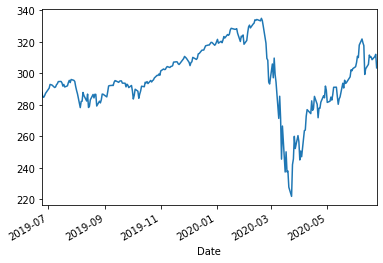

In [15]:
# Plot the price series for visual representation
close.plot()
plt.show()

In [16]:
# Calculate the 50DMA using the rolling() method
# As expected, the first 49 values of the series will be empty (NaN)
sma50 = close.rolling(window=50).mean()
sma50

Date
2019-06-24           NaN
2019-06-25           NaN
2019-06-26           NaN
2019-06-27           NaN
2019-06-28           NaN
                 ...    
2020-06-18    292.876374
2020-06-19    293.592587
2020-06-22    294.265364
2020-06-23    295.017319
2020-06-24    295.435787
Name: Adj Close, Length: 254, dtype: float64

In [17]:
# I can now plot the first moving average on a chart, using a predefined style
plt.style.use('fivethirtyeight')

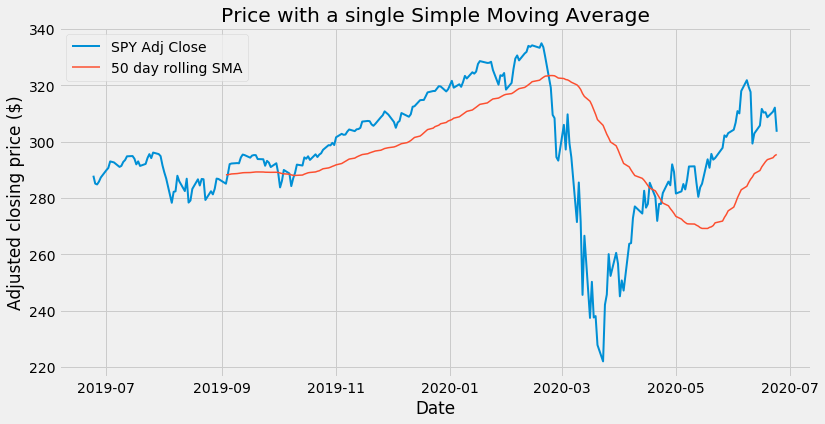

In [18]:
# Adding the 50DMA to the chart and displaying the chart

# The size for the chart:
plt.figure(figsize = (12,6))

#Plotting price and SMA lines:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)

#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()
plt.show()

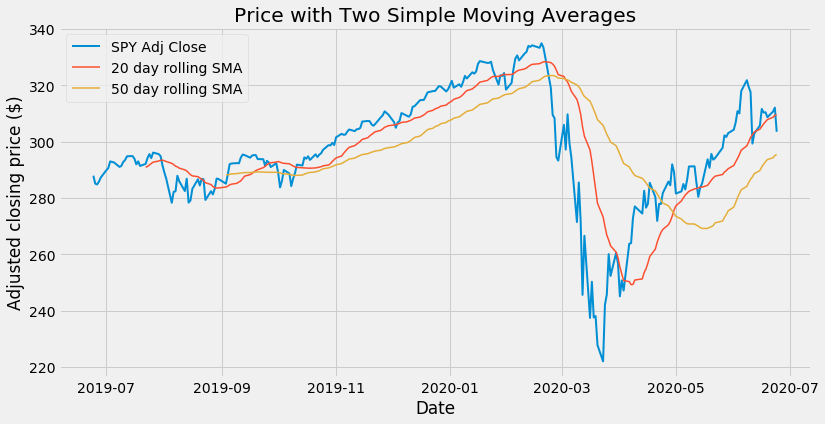

In [20]:
# Now I want to compare two moving averages with different length, 20 and 50 days
# First I must define the 20DMA
sma20 = close.rolling(window=20).mean()

plt.figure(figsize = (12,6))
#Plotting price with two SMAs:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma20, label='20 day rolling SMA', linewidth = 1.5)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages')
plt.legend()
plt.show()

In [21]:
# Now I want to create a new dataframe that includes price and SMA's
priceSma_df = pd.DataFrame({
      'Adj Close' : close,
      'SMA 20' : sma20,
      'SMA 50' : sma50
     })
priceSma_df

,Adj Close,SMA 20,SMA 50
Date,,,
2019-06-24,287.892944,NaN,NaN
2019-06-25,285.069305,NaN,NaN
2019-06-26,284.785004,NaN,NaN
2019-06-27,285.794830,NaN,NaN
2019-06-28,287.265442,NaN,NaN
...,...,...,...
2020-06-18,310.414001,307.048305,292.876374
2020-06-19,308.640015,307.800903,293.592587
2020-06-22,310.619995,308.624623,294.265364


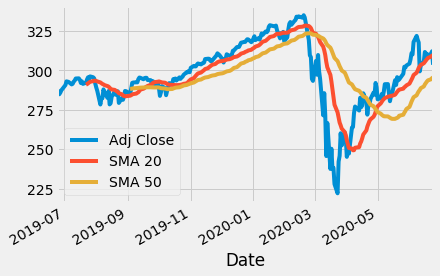

In [22]:
# Having the series in a single dataframe makes it easy to create a quick plot
priceSma_df.plot()
plt.show()